In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [453]:
x = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Vs code files\\ML models\\x.csv')
y = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Vs code files\\ML models\\y.csv')

print(x.shape, y.shape)

(2109, 16) (2109, 1)


In [454]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y, test_size = 0.2, random_state = 42)

In [455]:
def ml_model(x_train,
             x_test = None, 
             y_train = None,
             y_test = None, 
             category = None, 
             model = None,
             C = 1,
             max_depth = None, 
             alpha = 1, 
             n_estimators = None,
             iterations = 1000,
             depth = 6,
             num_leaves = 31,
             kernel = 'rbf',
             n_neighbors = 5, 
             metric = 'minkowski',
             n_clusters = None, 
             linkage = 'ward', 
             n_components = None, 
             eps = 0.5, 
             min_samples = 5,
             l1_ratio = 0.5,
             learning_rate = None):

    from sklearn.model_selection import train_test_split as tts
    import time

    if isinstance(model, str):
        model = [model]

    categories = ['regression', 'classification', 'clustering', 'dim_reduction', 'deep learning']    
    results = []
    models_dict = {}

    if category == 'regression':
        from sklearn.metrics import r2_score, mean_squared_error
        possible_t = ['linear', 'ridge', 'lasso', 'random_forest', 'elastic_net', 'svm', 'decision_tree', 'xgboost', 'catboost', 'light_gbm']
        model = model if model is not None else possible_t  
        for modell in model:
            if modell == 'linear':
                from sklearn.linear_model import LinearRegression
                model_lr = LinearRegression()
                start_time = time.time()
                model_lr.fit(x_train, y_train)
                y_pred_lr = model_lr.predict(x_test)
                r2_lr = r2_score(y_test, y_pred_lr)
                mse_lr = mean_squared_error(y_test, y_pred_lr)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_lr', 'R2 Score': r2_lr, 'MSE': mse_lr, 'Time Taken (s)': end_time - start_time})
                models_dict['linear'] = model_lr

            if modell == 'ridge':
                from sklearn.linear_model import Ridge
                model_ridge = Ridge(alpha = alpha)
                start_time = time.time()
                model_ridge.fit(x_train, y_train)
                y_pred_ridge = model_ridge.predict(x_test)
                r2_ridge = r2_score(y_test, y_pred_ridge)
                mse_ridge = mean_squared_error(y_test, y_pred_ridge)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_ridge', 'R2 Score': r2_ridge, 'MSE': mse_ridge, 'Time Taken (s)': end_time - start_time})
                models_dict['ridge'] = model_ridge

            if modell == 'lasso':
                from sklearn.linear_model import Lasso
                model_lasso = Lasso(alpha = alpha)
                start_time = time.time()
                model_lasso.fit(x_train, y_train)
                y_pred_lasso = model_lasso.predict(x_test)
                r2_lasso = r2_score(y_test, y_pred_lasso)
                mse_lasso = mean_squared_error(y_test, y_pred_lasso)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_lasso', 'R2 Score': r2_lasso, 'MSE': mse_lasso, 'Time Taken (s)': end_time - start_time})
                models_dict['lasso'] = model_lasso

            if modell == 'random_forest':
                from sklearn.ensemble import RandomForestRegressor
                if n_estimators == None:
                    n_estimators = 100
                model_rf = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators)
                start_time = time.time()
                model_rf.fit(x_train, y_train)
                y_pred_rf = model_rf.predict(x_test)
                r2_rf = r2_score(y_test, y_pred_rf)
                mse_rf = mean_squared_error(y_test, y_pred_rf)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_rf', 'R2 Score': r2_rf, 'MSE': mse_rf, 'Time Taken (s)': end_time - start_time})
                models_dict['random_forest'] = model_rf

            if modell == 'elastic_net':
                from sklearn.linear_model import ElasticNet
                model_en = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
                start_time = time.time()
                model_en.fit(x_train, y_train)
                y_pred_en = model_en.predict(x_test)
                r2_en = r2_score(y_test, y_pred_en)
                mse_en = mean_squared_error(y_test, y_pred_en)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_en', 'R2 Score': r2_en, 'MSE': mse_en, 'Time Taken (s)': end_time - start_time})
                models_dict['elastic_net'] = model_en

            if modell == 'svm':
                from sklearn.svm import SVR
                model_svr = SVR(C = C, kernel = kernel)
                start_time = time.time()
                model_svr.fit(x_train, y_train)
                y_pred_svr = model_svr.predict(x_test)
                r2_svr = r2_score(y_test, y_pred_svr)
                mse_svr = mean_squared_error(y_test, y_pred_svr)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_svr', 'R2 Score': r2_svr, 'MSE': mse_svr, 'Time Taken (s)': end_time - start_time})
                models_dict['svm'] = model_svr

            if modell == 'decision_tree':
                from sklearn.tree import DecisionTreeRegressor
                model_dtr = DecisionTreeRegressor(max_depth = max_depth)
                start_time = time.time()
                model_dtr.fit(x_train, y_train)
                y_pred_dtr = model_dtr.predict(x_test)
                r2_dtr = r2_score(y_test, y_pred_dtr)
                mse_dtr = mean_squared_error(y_test, y_pred_dtr)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_dtr', 'R2 Score': r2_dtr, 'MSE': mse_dtr, 'Time Taken (s)': end_time - start_time})
                models_dict['decision_tree'] = model_dtr

            if modell == 'xgboost':
                from xgboost import XGBRegressor
                if n_estimators == None:
                    n_estimators = 100
                if learning_rate == None:
                    learning_rate = 0.3
                if max_depth == None:
                    max_depth = 6
                model_xgb = XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
                start_time = time.time()
                model_xgb.fit(x_train, y_train)
                y_pred_xgb = model_xgb.predict(x_test)
                r2_xgb = r2_score(y_test, y_pred_xgb)
                mse_xgb = mean_squared_error(y_test, y_pred_xgb)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_xgb', 'R2 Score': r2_xgb, 'MSE': mse_xgb, 'Time Taken (s)': end_time - start_time})
                models_dict['xgboost'] = model_xgb

            if modell == 'catboost':
                from catboost import CatBoostRegressor
                if learning_rate == None:
                    learning_rate = 0.03
                model_cat = CatBoostRegressor(iterations = iterations, depth = depth, learning_rate = learning_rate, verbose = 0)
                start_time = time.time()
                model_cat.fit(x_train, y_train)
                y_pred_cat = model_cat.predict(x_test)
                r2_cat = r2_score(y_test, y_pred_cat)
                mse_cat = mean_squared_error(y_test, y_pred_cat)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_cat', 'R2 Score': r2_cat, 'MSE': mse_cat, 'Time Taken (s)': end_time - start_time})
                models_dict['catboost'] = model_cat

            if modell == 'light_gbm':
                from lightgbm import LGBMRegressor
                if learning_rate == None:
                    learning_rate = 0.1
                if n_estimators == None:
                    n_estimators = 6
                model_lgbm = LGBMRegressor(num_leaves = num_leaves, learning_rate = learning_rate, n_estimators = n_estimators)
                start_time = time.time()
                model_lgbm.fit(x_train, y_train)
                y_pred_lgbm = model_lgbm.predict(x_test)
                r2_lgbm = r2_score(y_test, y_pred_lgbm)
                mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_lgbm', 'R2 Score': r2_lgbm, 'MSE': mse_lgbm, 'Time Taken (s)': end_time - start_time})
                models_dict['light_gbm'] = model_lgbm

            if modell not in possible_t:
                print(f'Ivalid model! Choose one or more of this options:\n> {possible_t}')
        
        results_df = pd.DataFrame(results).sort_values(by = 'R2 Score', ascending = False)

    if category == 'classification':
        from sklearn.metrics import accuracy_score
        possible_t = ['logistic', 'random_forest', 'knn', 'svm', 'decision_tree', 'xgboost', 'catboost', 'light_gbm']
        model = model if model is not None else possible_t  
        for modell in model:
            if modell == 'logistic':
                from sklearn.linear_model import LogisticRegression
                model_lc = LogisticRegression(C = C)
                start_time = time.time()
                model_lc.fit(x_train, y_train)
                y_pred_lc = model_lc.predict(x_test)
                accuracy_lc = accuracy_score(y_test, y_pred_lc)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_lc', 'Accuracy': accuracy_lc, 'Time Taken (s)': end_time - start_time})
                models_dict['logistic'] = model_lc

            if modell == 'decision_tree':
                from sklearn.tree import DecisionTreeClassifier
                model_dt = DecisionTreeClassifier(max_depth = max_depth)
                start_time = time.time()
                model_dt.fit(x_train, y_train)
                y_pred_dt = model_dt.predict(x_test)
                accuracy_dt = accuracy_score(y_test, y_pred_dt)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_dt', 'Accuracy': accuracy_dt, 'Time Taken (s)': end_time - start_time})
                models_dict['decision_tree'] = model_dt

            if modell == 'knn':
                from sklearn.neighbors import KNeighborsClassifier
                model_knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric = metric)
                start_time = time.time()
                model_knn.fit(x_train, y_train)
                y_pred_knn = model_knn.predict(x_test)
                accuracy_knn = accuracy_score(y_test, y_pred_knn)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_knn', 'Accuracy': accuracy_knn, 'Time Taken (s)': end_time - start_time})
                models_dict['knn'] = model_knn

            if modell == 'svm':
                from sklearn.svm import SVC
                model_svm = SVC(C = C, kernel = kernel)
                start_time = time.time()
                model_svm.fit(x_train, y_train)
                y_pred_svm = model_svm.predict(x_test)
                accuracy_svm = accuracy_score(y_test, y_pred_svm)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_svm', 'Accuracy': accuracy_svm, 'Time Taken (s)': end_time - start_time})
                models_dict['svm'] = model_svm

            if modell == 'random_forest':
                from sklearn.ensemble import RandomForestClassifier
                if n_estimators == None:
                    n_estimators = 100
                model_rf = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)
                start_time = time.time()
                model_rf.fit(x_train, y_train)
                y_pred_rf = model_rf.predict(x_test)
                accuracy_rf = accuracy_score(y_test, y_pred_rf)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_rf', 'Accuracy': accuracy_rf, 'Time Taken (s)': end_time - start_time})
                models_dict['random_forest'] = model_rf

            if modell == 'xgboost':
                from xgboost import XGBClassifier
                if n_estimators == None:
                    n_estimators = 100
                if learning_rate == None:
                    learning_rate = 0.1
                if max_depth == None:
                    max_depth = 6
                model_xgb = XGBClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
                start_time = time.time()
                model_xgb.fit(x_train, y_train)
                y_pred_xgb = model_xgb.predict(x_test)
                accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_xgb', 'Accuracy': accuracy_xgb, 'Time Taken (s)': end_time - start_time})
                models_dict['xgboost'] = model_xgb

            if modell == 'catboost':
                from catboost import CatBoostClassifier
                if learning_rate == None:
                    learning_rate = 0.03
                model_cat = CatBoostClassifier(iterations = iterations, depth = depth, learning_rate = learning_rate, verbose = 0)
                start_time = time.time()
                model_cat.fit(x_train, y_train)
                y_pred_cat = model_cat.predict(x_test)
                accuracy_cat = accuracy_score(y_test, y_pred_cat)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_cat', 'Accuracy': accuracy_cat, 'Time Taken (s)': end_time - start_time})
                models_dict['catboost'] = model_cat

            if modell == 'light_gbm':
                from lightgbm import LGBMClassifier
                if learning_rate == None:
                    learning_rate = 0.1
                if n_estimators == None:
                    n_estimators = 6
                model_lgbm = LGBMClassifier(num_leaves = num_leaves, learning_rate = learning_rate, n_estimators = n_estimators, verbose = - 1)
                start_time = time.time()
                model_lgbm.fit(x_train, y_train)
                y_pred_lgbm = model_lgbm.predict(x_test)
                accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
                end_time = time.time()
                results.append({'Model': modell, 'Model name': 'model_lgbm', 'Accuracy': accuracy_lgbm, 'Time Taken (s)': end_time - start_time})
                models_dict['light_gbm'] = model_lgbm

            results_df = pd.DataFrame(results).sort_values(by = 'Accuracy', ascending = False)

            if modell not in possible_t:
                print(f'Ivalid model! Choose one of this option:\n> {possible_t}')

    if category == 'clustering':
        possible_t = ['k_means', 'agglomerative', 'db_scan']
        model = model if model is not None else possible_t  
        for modell in model:
            if modell == 'k_means':
                from sklearn.cluster import KMeans
                if n_clusters == None:
                    n_clusters = 8
                model_km = KMeans(n_clusters = n_clusters, random_state = 42)
                start_time = time.time()
                model_km.fit(x)
                y_pred = model_km.labels_
                end_time = time.time()
                
            if modell == 'agglomerative':
                if n_clusters == None:
                    n_clusters = 2
                from sklearn.cluster import AgglomerativeClustering
                model_hc = AgglomerativeClustering(n_clusters = n_clusters , linkage = linkage)
                start_time = time.time()
                y_pred = model_hc.fit_predict(x)
                end_time = time.time()
            
            if modell == 'db_scan':
                from sklearn.cluster import DBSCAN
                model_dbscan = DBSCAN(eps = eps, min_samples = min_samples)
                start_time = time.time()
                model_dbscan.fit(x)
                y_pred = model_dbscan.labels_
                end_time = time.time()

            if modell not in possible_t:
                print(f'Ivalid model! Choose one of this option:\n> {possible_t}')

    if category == 'dim_reduction':
        from sklearn.decomposition import PCA
        model_pca = PCA(n_components = n_components)
        start_time = time.time()
        model_pca.fit(x_train)
        x_train_pca = model_pca.transform(x_train)
        x_test_pca = model.pca.transform(x_test)
        end_time = time.time()
    
    if category == 'deep learning':
        print('Still not available!')
    
    if category in categories:
        return results_df, models_dict
    else:
        print(f'Ivalid category! Choose one or more of this options:\n> {categories}')
            

In [456]:
results, trained_models = ml_model(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, category = 'classification')
print(results)

           Model  Model name  Accuracy  Time Taken (s)
6       catboost   model_cat  0.976303       11.719611
7      light_gbm  model_lgbm  0.976303        0.488044
5        xgboost   model_xgb  0.969194        0.479534
1  random_forest    model_rf  0.957346        0.356138
4  decision_tree    model_dt  0.936019        0.013380
3            svm   model_svm  0.890995        0.171051
0       logistic    model_lc  0.855450        0.076773
2            knn   model_knn  0.810427        0.044651


In [457]:
model_cat = trained_models['catboost']
model_lgbm = trained_models['light_gbm']
model_xgb = trained_models['xgboost']
model_rf = trained_models['random_forest']

In [458]:
def feat_imp(model, x, model_name = None):

    if isinstance(model, str):
        model = [model]

    if isinstance(model_name, str):
        model_name = [model_name]
    
    for name, model in zip(model_name, model):
        # Get feature importance scores
        importances = model.feature_importances_
        feature_names = x.columns
        # Create a DataFrame
        feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)


        # Plot feature importance
        fig, ax = plt.subplots(figsize=(8, 4))
        bars = ax.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')

        # Add value labels
        ax.bar_label(bars, fmt='%.2f')
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.title("Feature Importance " + name.upper())
        plt.gca().invert_yaxis()
        plt.show()
        plt.clf()

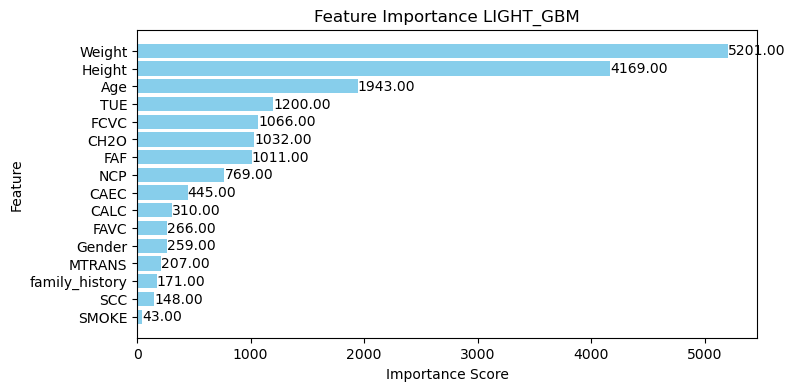

<Figure size 640x480 with 0 Axes>

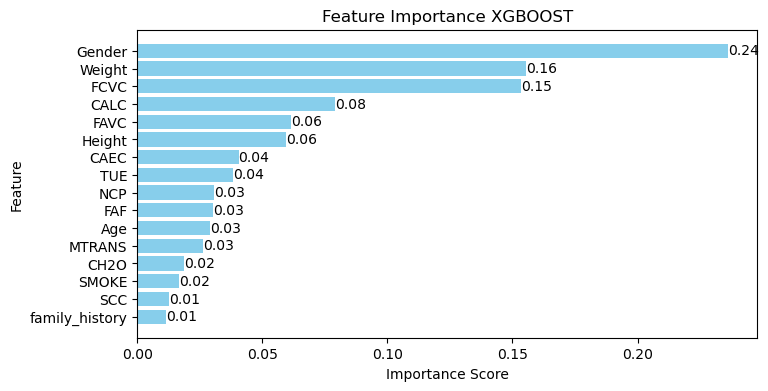

<Figure size 640x480 with 0 Axes>

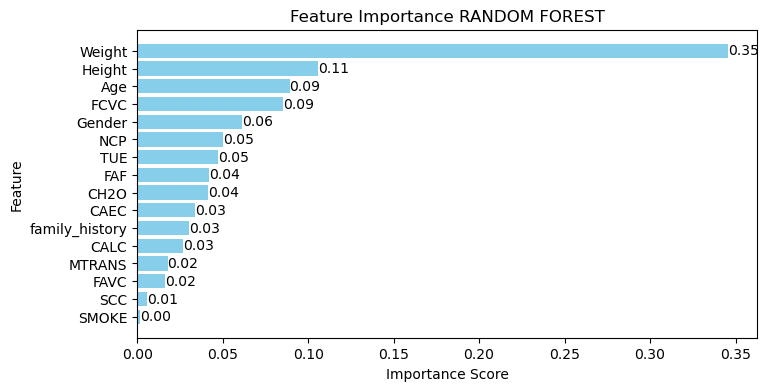

<Figure size 640x480 with 0 Axes>

In [459]:
feat_imp(model = [model_lgbm, model_xgb, model_rf], x = x, model_name = ['light_gbm', 'xgboost', 'random forest'])